### Installing required Packages

In [1]:
from scipy.io import arff

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
#import statsmodels.formula.api as sm
from sklearn import linear_model
warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('1year.arff')
df = pd.DataFrame(data[0])

df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [40]:
data2 = arff.loadarff('2year.arff')
df2 = pd.DataFrame(data2[0])

data3 = arff.loadarff('3year.arff')
df3 = pd.DataFrame(data3[0])

data4 = arff.loadarff('4year.arff')
df4 = pd.DataFrame(data4[0])

data5 = arff.loadarff('5year.arff')
df5 = pd.DataFrame(data5[0])

In [41]:
final = df.append([df2,df3,df4,df5])

In [42]:
final.shape

(43405, 65)

In [82]:
df.to_csv('df.csv')

In [5]:
import matplotlib
import missingno as msno
%matplotlib inline

In [ ]:
#df.rename(columns={'Attr1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [5]:
train = df.iloc[:,:64]
train_labels = df.iloc[:,np.r_[64]]

In [6]:
missingdata_df = df.isnull().any()

In [7]:
columns_missing  =  list(missingdata_df)
columns_missing

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False]

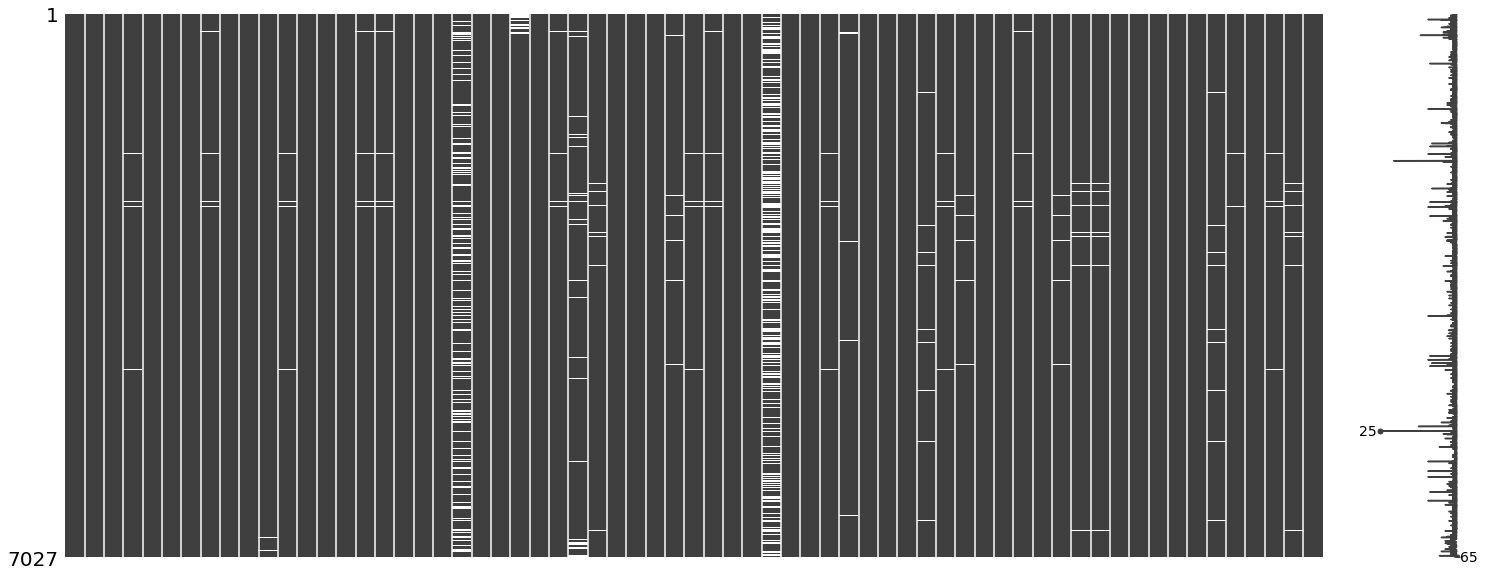

In [48]:
msno.matrix(df)

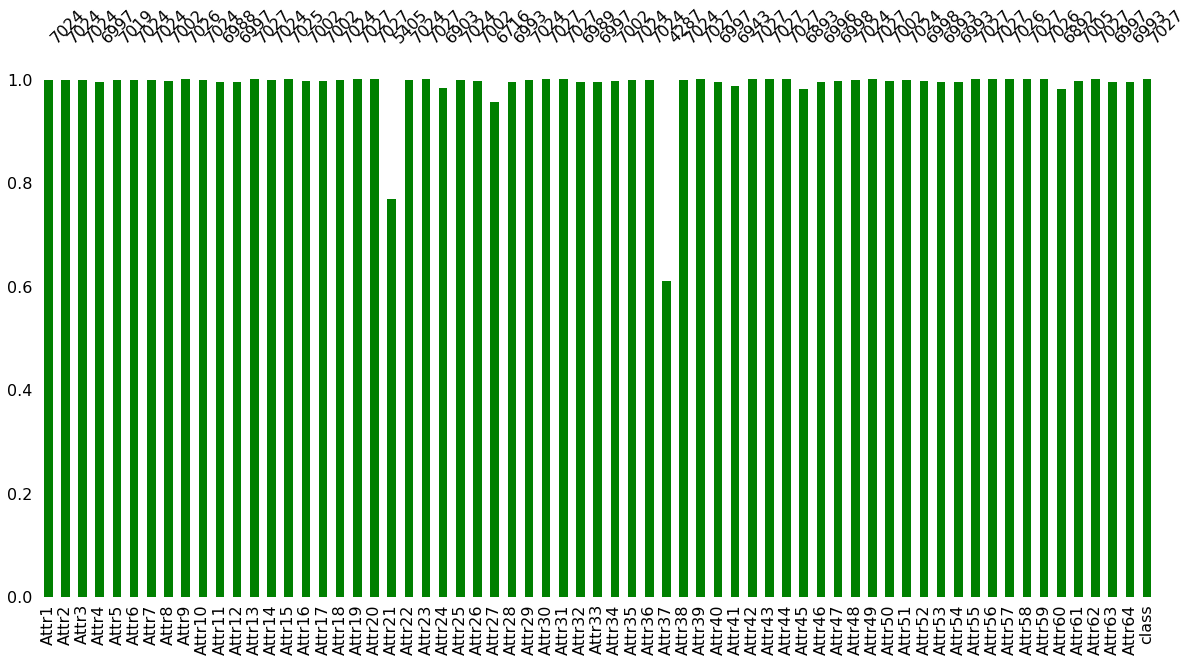

In [87]:
msno.bar(df,color = "green",figsize = (20,10))

In [99]:
##two columns dropped
df_new = df.iloc[:,np.r_[0:20,21:36,37:65]]

In [78]:
df_new

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.379510,0.396410,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.65800,4.41580,7.42770,b'0'
1,0.209120,0.499880,0.472250,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.35000,3.40000,60.98700,b'0'
2,0.248660,0.695920,0.267130,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.27000,2.71850,5.20780,b'0'
3,0.081483,0.307340,0.458790,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.43500,4.22280,5.54970,b'0'
4,0.187320,0.613230,0.229600,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.21000,2.86920,7.89800,b'0'
5,0.228220,0.497940,0.359690,1.75020,-47.7170,0.000000,0.281390,1.008300,1.97860,0.502060,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.44400,4.12690,12.29900,b'0'
6,0.111090,0.647440,0.289710,1.47050,2.5349,0.000000,0.111090,0.544540,1.73480,0.352560,...,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.55000,2.81730,18.35200,b'0'
7,0.532320,0.027059,0.705540,53.95400,299.5800,0.000000,0.652400,35.957000,0.65273,0.972940,...,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.45030,48.99100,2.32170,b'0'
8,0.009020,0.632020,0.053735,1.12630,-37.8420,0.000000,0.014434,0.582230,1.33320,0.367980,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.50000,3.13300,2.56030,b'0'
9,0.124080,0.838370,0.142040,1.16940,-91.8830,0.000000,0.153280,0.192790,2.11560,0.161630,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.63000,2.52360,107.67000,b'0'


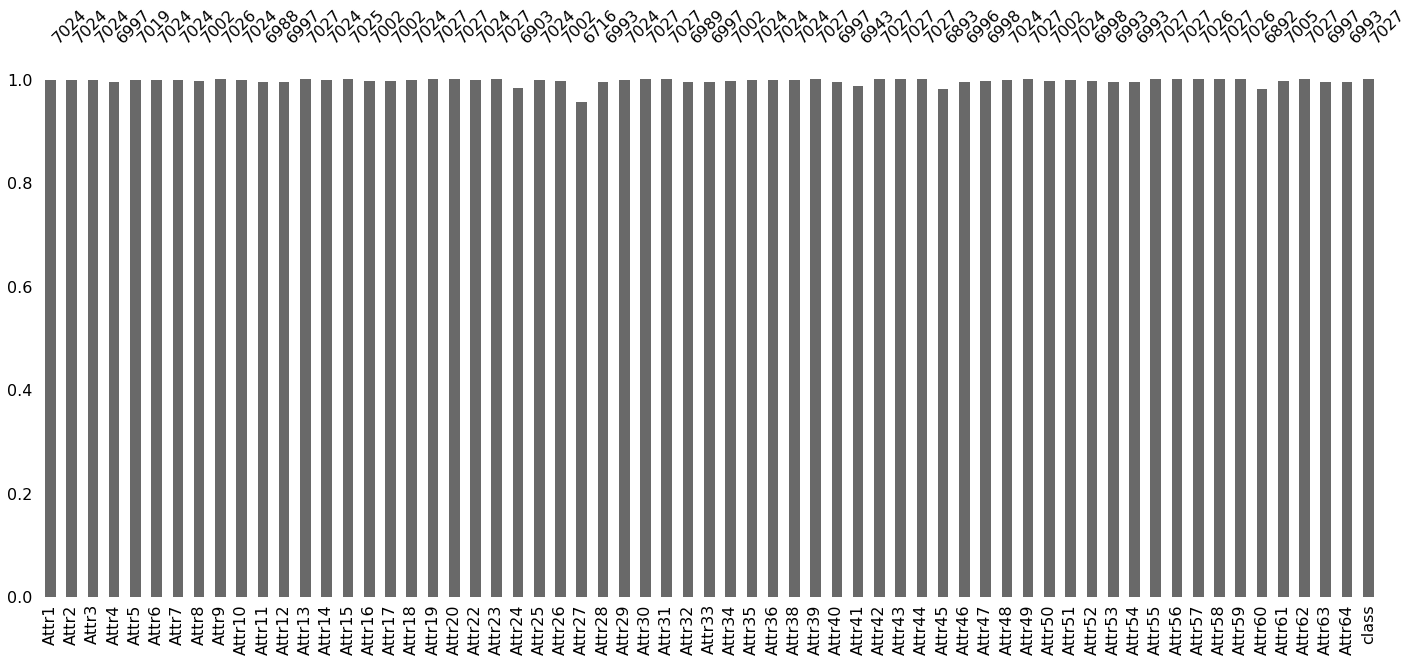

In [88]:
msno.bar(df_new)

In [54]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


In [14]:
df_new.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr22', 'Attr23',
       'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30',
       'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr38',
       'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45',
       'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52',
       'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59',
       'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class'],
      dtype='object')

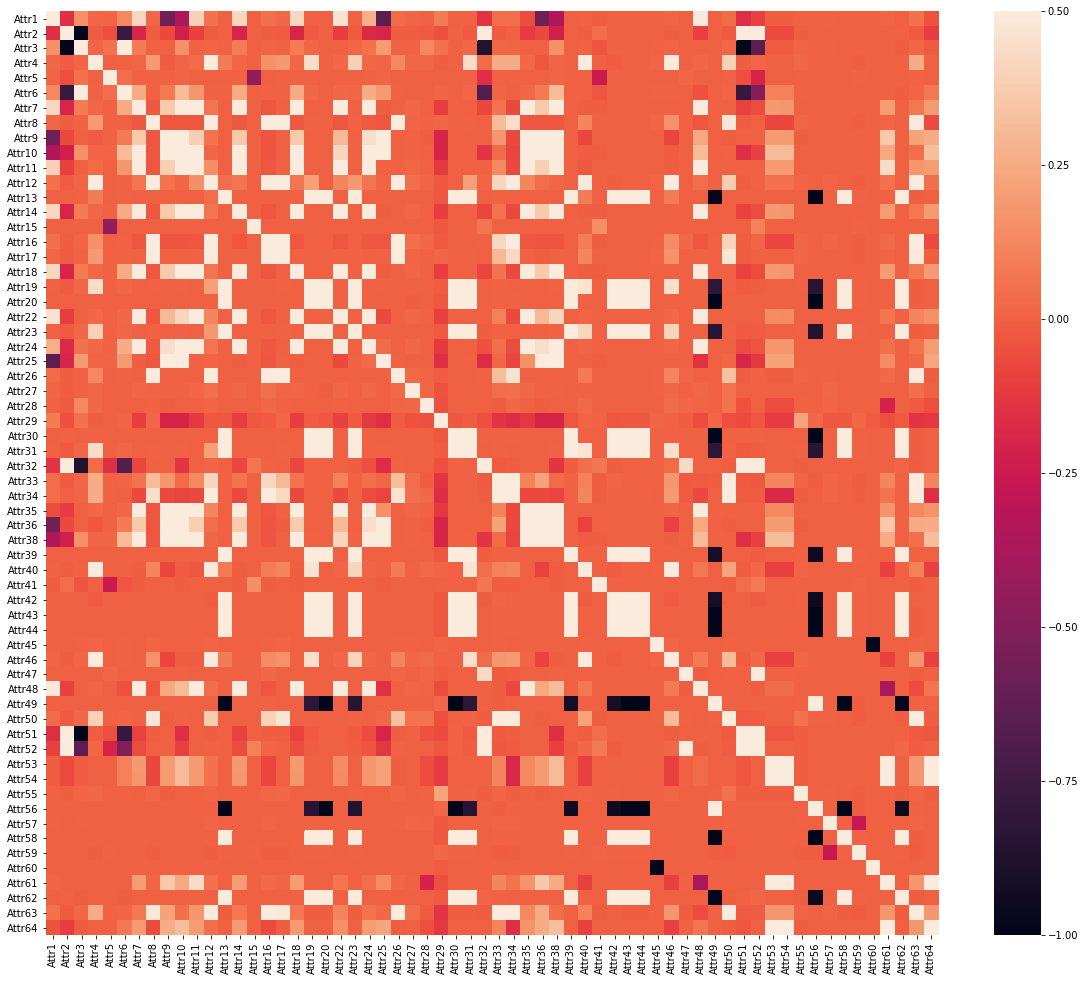

In [9]:
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(corrmat, vmax=.5);

In [100]:
df_new.shape

(7027, 63)

In [20]:
##creating half dataset  fd
df1 = df_new.iloc[:,np.r_[0:30]]
df2 = df_new.iloc[:,np.r_[30:63]]

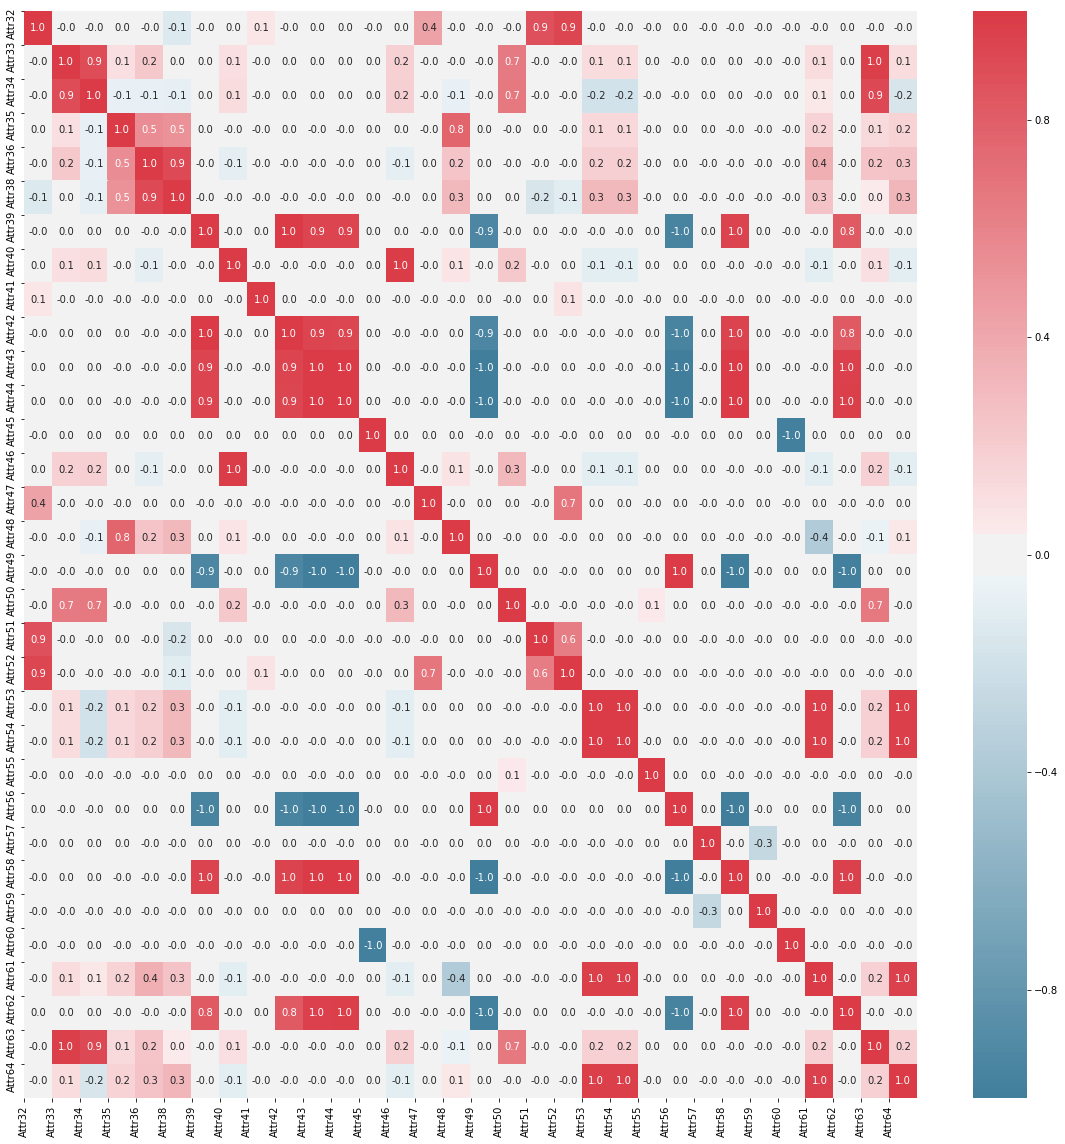

In [24]:
corr = df2.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(230, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".1f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

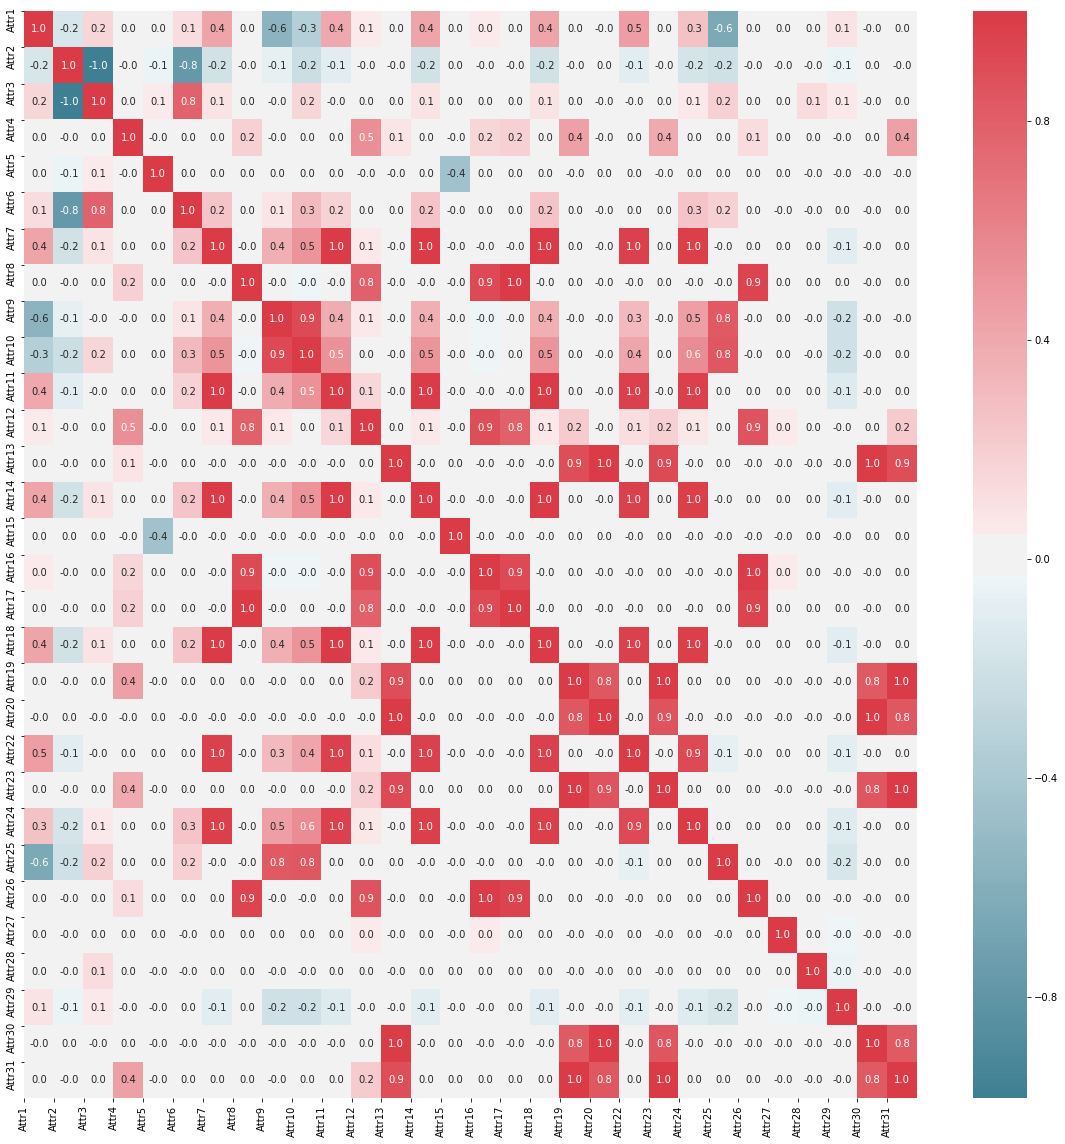

In [22]:
corr = df1.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".1f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

##Attr - 2,3,6,32,51,52
##Attr - 33,34,50,63
##Attr - 7,11,14,18,22,24
##Attr - 8,12,16,17,,26
##Attr - 13,19,20,23,30,31
##Attr - 53,54,61
##Attr - 47,52
##Attr - 45,60
##Attr - 13,31,39,42,43,44,49,56,58,62
##Attr - 4,40,46
##Attr - 36,38,9,10,25
##Attr - 35,48,24,7,11,14,18,22


In [ ]:

df_new = df_new.iloc[:,np.r_[1,3,4,5,7,8,10,16,]]

In [86]:
df_new.shape

(7027, 63)

In [ ]:
Data PreProcessing

### Skewness before feature scaling

In [92]:
for i in df_new.skew().keys():        
        print("Just finished {} with skew {}".format(str(i), str(df_new.skew()[i])))

Just finished Attr1 with skew -49.92198157399967
Just finished Attr2 with skew 79.39007877110372
Just finished Attr3 with skew -82.99991484507986
Just finished Attr4 with skew 65.76689112990184
Just finished Attr5 with skew -52.54575303319939
Just finished Attr6 with skew -22.48347901332244
Just finished Attr7 with skew 28.889891948563836
Just finished Attr8 with skew 67.27180234280138
Just finished Attr9 with skew 33.537757160036094
Just finished Attr10 with skew 26.096621542206037
Just finished Attr11 with skew 28.67046431096756
Just finished Attr12 with skew 45.173307481876684
Just finished Attr13 with skew 82.5348017586015
Just finished Attr14 with skew 28.889891948563836
Just finished Attr15 with skew -30.68488480973805
Just finished Attr16 with skew 57.603783882505475
Just finished Attr17 with skew 69.11724658094288
Just finished Attr18 with skew 28.889891948563836
Just finished Attr19 with skew 57.9643648744842
Just finished Attr20 with skew 83.82579140961471
Just finished Attr2

### Feature scaling using log(x+1)

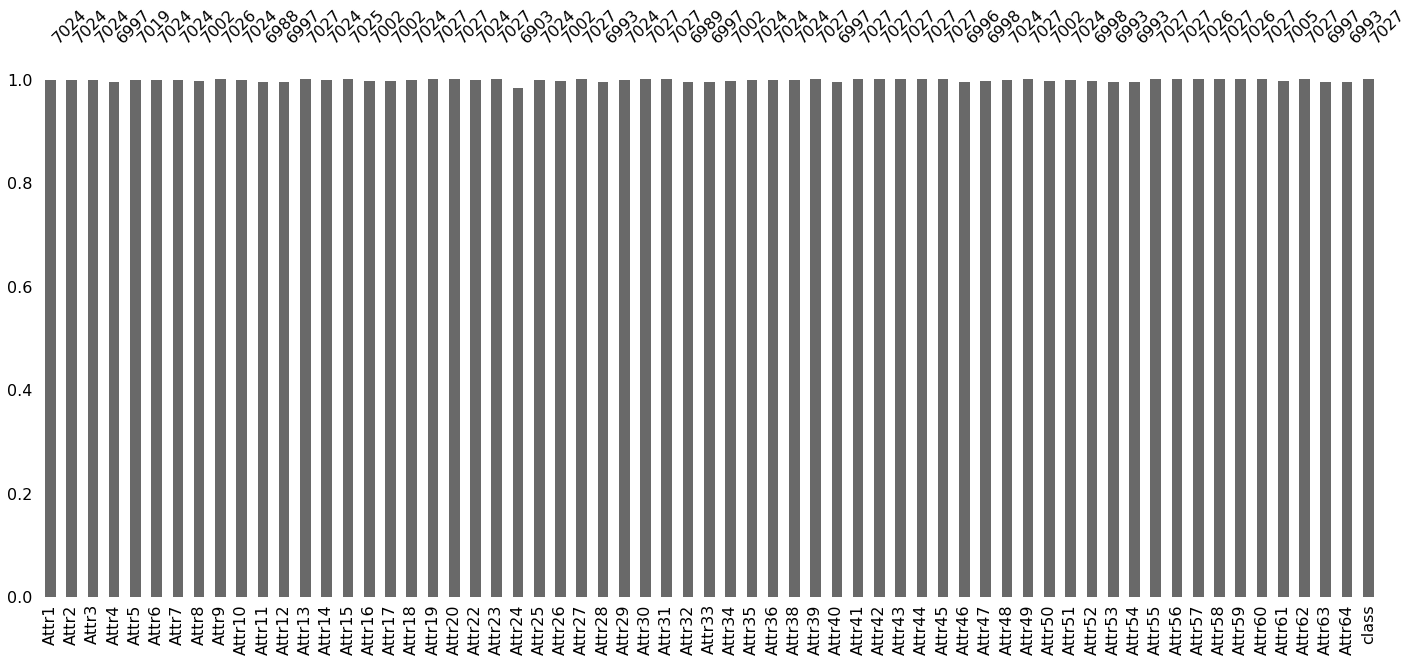

In [25]:
msno.bar(df_new)

### clean data - remove missing terms or impute them  ###27,45,60,24,41


In [101]:
#Treating Missing Values using scikit learn imputation Median imputation for four variables


#Treating Missing Values
df_new['Attr27'].fillna(df_new['Attr27'].median(), inplace=True)
#Treating Missing Values
df_new['Attr45'].fillna(df_new['Attr45'].median(), inplace=True)
#Treating Missing Values
df_new['Attr60'].fillna(df_new['Attr60'].median(), inplace=True)
df_new['Attr41'].fillna(df_new['Attr41'].median(), inplace=True)

In [102]:
df_new['Attr24'].fillna(df_new['Attr24'].median(), inplace=True)

In [103]:
df_new.shape

(7027, 63)

In [ ]:
##removing rows which have atleast one missing value

In [104]:
dfy1 = df_new.dropna(axis =0)

In [108]:
dfy1.shape  ###141 rows deleted

(6886, 63)

In [107]:
for i in dfy1.skew().keys():        
        dfy1[i] = np.log1p(dfy1[i])
        print("Just finished {} with skew {}".format(str(i), str(dfy1.skew()[i])))

Just finished Attr1 with skew -0.04417775441892413
Just finished Attr2 with skew 1.0079501195602152
Just finished Attr3 with skew -2.1388376226361383
Just finished Attr4 with skew 2.0329657889876898
Just finished Attr5 with skew 0.3684049734756707
Just finished Attr6 with skew -5.168292138898832
Just finished Attr7 with skew 0.2730861270749065
Just finished Attr8 with skew 1.344796532197514
Just finished Attr9 with skew 1.487013727678619
Just finished Attr10 with skew -4.139179846191666
Just finished Attr11 with skew 0.4863496356640927
Just finished Attr12 with skew 1.830649211048224
Just finished Attr13 with skew 17.57147980638836
Just finished Attr14 with skew 0.2730861270749065
Just finished Attr15 with skew 0.10650203729718237
Just finished Attr16 with skew 2.174999120386722
Just finished Attr17 with skew 2.0520278031464287
Just finished Attr18 with skew 0.2730861270749065
Just finished Attr19 with skew 18.219652433746845
Just finished Attr20 with skew -0.7020199668997956
Just fini

AttributeError: 'bytes' object has no attribute 'log1p'

In [67]:
#import featuretools as ft

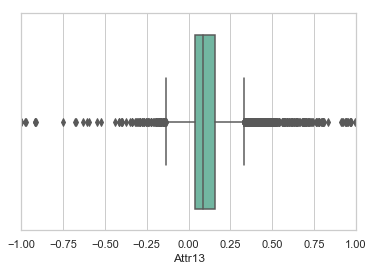

In [55]:
import seaborn as sns
plt.xlim([-1,1])
sns.set(style="whitegrid")
sns.boxplot(x=dfy1['Attr13'],palette="Set2")
#sns.swarmplot(x=df_new['Attr13'], color=".25")

In [ ]:
##renaming columns

In [ ]:
df.rename(columns={'Attr1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [109]:
dfy1['class'].value_counts()

b'0'    6658
b'1'     228
Name: class, dtype: int64

In [52]:
dfy1.shape

(6886, 63)

In [100]:
df_0.to_csv('df_0.csv')
dfy1.to_csv('dfy1.csv')


In [18]:
df_0 =dfy1.iloc[:6658,62:]
df_0['new_class'] = '0'

In [19]:
df_1 = dfy1.iloc[6658:,62:]
df_1['new_class'] = '1'

In [20]:
y = df_0.append([df_1])

In [21]:
y = y.iloc[:,1:]

In [110]:
df_0.shape

(6658, 2)

In [111]:
y.shape

(6886, 1)

In [24]:
X = dfy1.iloc[:,0:62]

In [122]:
#y= dfy1.iloc[:,62:]

In [25]:
y['new_class'].value_counts()

0    6658
1     228
Name: new_class, dtype: int64

In [ ]:
##class imbalance
##concatenate data and do seperately also
##classification models
##ANN
##xgboost
##missing data handling

In [26]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'new_class': 1})


In [27]:
smote = SMOTE(sampling_strategy='minority', n_jobs=1)
X_res, y_res = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'0': 6658, '1': 6658})


In [22]:
y_res

array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [173]:
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE
ada = ADASYN(sampling_strategy='auto',n_neighbors=5,random_state=42)
X_res1, y_res1 = ada.fit_resample(X, y)

Resampled dataset shape Counter({'new_class': 1})


In [172]:
print('Resampled dataset shape %s' % Counter(y_res1))

Resampled dataset shape Counter({'1': 6690, '0': 6658})


In [174]:
###Creating the dataset again
##random sampling
##leaving out 10% for validation


array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [28]:
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
#y = scaler.fit_transform(y)

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

# ANN using keras 

In [31]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [62]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(31, activation='relu', kernel_initializer='random_normal', input_dim=62))
classifier.add(Dropout(rate=0.2))
#Second  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate=0.2))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [63]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [64]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=50)

Epoch 1/50
9321/9321 [==============================] - 2s 197us/step - loss: 0.6059 - acc: 0.6883
Epoch 2/50
9321/9321 [==============================] - 2s 171us/step - loss: 0.5122 - acc: 0.7529
Epoch 3/50
9321/9321 [==============================] - 2s 211us/step - loss: 0.4779 - acc: 0.7777
Epoch 4/50
9321/9321 [==============================] - 2s 202us/step - loss: 0.4496 - acc: 0.7948
Epoch 5/50
9321/9321 [==============================] - 2s 170us/step - loss: 0.4282 - acc: 0.8081
Epoch 6/50
9321/9321 [==============================] - 2s 194us/step - loss: 0.4132 - acc: 0.8135
Epoch 7/50
9321/9321 [==============================] - 2s 197us/step - loss: 0.3946 - acc: 0.8275
Epoch 8/50
9321/9321 [==============================] - 2s 222us/step - loss: 0.3743 - acc: 0.8375
Epoch 9/50
9321/9321 [==============================] - 2s 218us/step - loss: 0.3597 - acc: 0.8457
Epoch 10/50
9321/9321 [==============================] - 1s 123us/step - loss: 0.3481 - acc: 0.8495
Epoch 11/

In [36]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

9321/9321 [==============================] - 0s 21us/step


[0.34502863763113056, 0.8417551764896046]

In [39]:
y_pred = classifier.predict(X_test)


In [43]:
y__test = y_test.astype(int)

In [44]:
y__pred = (y_pred>0.5)
ypred = y__pred.astype(int)

In [68]:
ypred = np.array(ypred)

In [46]:
y__test

array([0, 1, 1, ..., 0, 0, 1])

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y__test, ypred)
print(cm)

[[1554  449]
 [ 195 1797]]


In [48]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

Accuracy: 83.87984981226533%


## Hyperparameters tuning 

In [55]:
from keras.utils import to_categorical
output_category = to_categorical(y_train, num_classes=None)
output_category

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [59]:
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

In [30]:
for train_index, test_index in sss.split(X_res, y_res):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X_res[train_index], X_res[test_index]
    y_train1, y_test1 = y_res[train_index], y_res[test_index]

TRAIN: [10670  3253  7473 ...  2700  2262   192] TEST: [ 1510  8976  2219 ...  7723 10891 11304]
TRAIN: [ 7883  5056  5767 ... 12333   780  8035] TEST: [ 6773  2250  6587 ...  7707 12849  9713]
TRAIN: [11363   975 10613 ... 11589  7516  6072] TEST: [ 4033 10546  9660 ...  6389  6308  4301]
TRAIN: [12069   415  7613 ...   983 12197  3013] TEST: [13261  7941  7890 ...    45  8540  9767]
TRAIN: [6466 7674 8335 ... 2497 4782 3805] TEST: [ 309 4145 8271 ... 1954 4162 2120]


# Random forest classification using scikit-learn

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [69]:
print(clf.feature_importances_)

[0.0163304  0.05030065 0.01274907 0.02631992 0.01040368 0.02057644
 0.015525   0.00625334 0.         0.03850492 0.00133474 0.03093041
 0.07866333 0.00577677 0.00214905 0.02170879 0.         0.01042378
 0.0423563  0.         0.00121689 0.03599017 0.14459549 0.00166271
 0.06739512 0.07086517 0.00150238 0.00321778 0.00168068 0.03006262
 0.00292092 0.         0.         0.00080713 0.00179661 0.06277814
 0.00134436 0.         0.00649608 0.00144514 0.         0.
 0.00169089 0.07494271 0.         0.00325884 0.00047534 0.00147102
 0.03865899 0.00449196 0.         0.00682418 0.01933394 0.00457835
 0.         0.00527061 0.00491785 0.00046765 0.00077195 0.00125473
 0.         0.00550697]


In [70]:
print(clf.predict(X_test))

['1' '1' '0' ... '1' '0' '1']


In [ ]:
print(clf.predict(X_test))

In [71]:
print(clf.score(X_test,y_test))

0.7071339173967459


In [76]:
print(clf.n_classes_)

2


In [103]:
from sklearn.metrics import accuracy_score
score_train_RF = []
score_test_RF = []
factor = []
for i in range(4,30,4):
    clf_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
    clf_rf = clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    factor.append(i)
    score_train_RF.append(accuracy_score(y_train,clf_rf.predict(X_train)))
    score_test_RF.append(accuracy_score(y_test,clf_rf.predict(X_test)))


In [104]:
df_RF = pd.DataFrame()
df_RF['Training_accuracy'] = score_train_RF
df_RF['Test_accuracy'] = score_test_RF
df_RF['K'] =factor

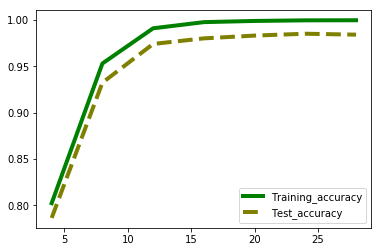

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_RF , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_RF, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [111]:
y_t_int = y_test.astype(np.int)

In [113]:
y_p_int = y_pred_rf.astype(np.int)

In [ ]:
##AUROC curve

In [119]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_t_int, y_p_int)

In [120]:
metrics.auc(fpr, tpr)

0.9842377498010012

In [109]:
y_pred_rf

array(['0', '1', '1', ..., '1', '0', '1'], dtype=object)

In [121]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_t_int, y_p_int)

0.9842377498010012

In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)

In [124]:
from sklearn.metrics import f1_score

In [125]:
f1_score(y_t_int, y_p_int, average='weighted')  

0.9842302878598248

# Boosting techniques

In [133]:
from sklearn.ensemble import AdaBoostClassifier

In [134]:
score_train_ada = []
score_test_ada = []
factor = []
for i in range(1,5,1):
    clf_ada = AdaBoostClassifier(n_estimators=10, base_estimator=clf_rf,learning_rate=i)
    clf_ada = clf_ada.fit(X_train, y_train)
    y_pred_ada = clf_ada.predict(X_test)
    factor.append(i)
    score_train_ada.append(accuracy_score(y_train,clf_ada.predict(X_train)))
    score_test_ada.append(accuracy_score(y_test,clf_ada.predict(X_test)))


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=28, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=1, n_estimators=10, random_state=None)

In [ ]:
df_ada = pd.DataFrame()
df_ada['Training_accuracy'] = score_train_ada
df_ada['Test_accuracy'] = score_test_ada
df_ada['K'] =factor

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_ada , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_ada, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [136]:
print(clf_ada.score(X_test,y_test))

0.9882352941176471


# Gradient Boosting method

In [138]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification

In [139]:
clf_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf_gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import BaggingClassifier #For Classification
score_train_bag = []
score_test_bag = []
factor = []
for i in range(10,100,10):
    clf_bag = BaggingClassifier(n_estimators=i, max_samples=1.0, max_features=1.0)
    clf_bag.fit(X_train, y_train)
    y_pred_bag = clf_bag.predict(X_test)
    factor.append(i)
    score_train_bag.append(accuracy_score(y_train,clf_bag.predict(X_train)))
    score_test_bag.append(accuracy_score(y_test,clf_bag.predict(X_test)))


In [ ]:
df_bag = pd.DataFrame()
df_bag['Training_accuracy'] = score_train_bag
df_bag['Test_accuracy'] = score_test_bag
df_bag['K'] =factor

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_bag , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_bag, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

# Decision Tree Classifier 

In [91]:
#Decision Tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
score_train_DT = []
score_test_DT = []
factor = []
for i in range(4,30,4):
    clf_dt1 = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=i)
    clf_dt1 = clf_dt1.fit(X_train,y_train)
    y_pred_DT = clf_dt1.predict(X_test)
    factor.append(i)
    score_train_DT.append(accuracy_score(y_train,clf_dt1.predict(X_train)))
    score_test_DT.append(accuracy_score(y_test,y_pred_DT))


In [92]:
print(clf_dt1.score(X_test,y_test))

0.9386733416770964


In [93]:
df_DT = pd.DataFrame()
df_DT['Training_accuracy'] = score_train_DT
df_DT['Test_accuracy'] = score_test_DT
df_DT['K'] =factor

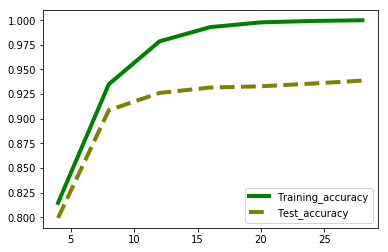

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_DT , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_DT, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

# Naive Bayes Classifier

In [95]:
from sklearn.naive_bayes import GaussianNB
score_train_NB = []
score_test_NB = []
factor = []
for i in range(20):
    clf = GaussianNB(var_smoothing = i)
    clf.fit(X_train,y_train)
    y_pred_NB = clf.predict(X_test)
    factor.append(i)
    score_train_NB.append(accuracy_score(y_train,clf.predict(X_train)))
    score_test_NB.append(accuracy_score(y_test,y_pred_NB))
        

In [96]:
print(clf.score(X_test,y_test))

0.5008760951188986


In [97]:
df_NB = pd.DataFrame()
df_NB['Training_accuracy'] = score_train_NB
df_NB['Test_accuracy'] = score_test_NB
df_NB['K'] =factor

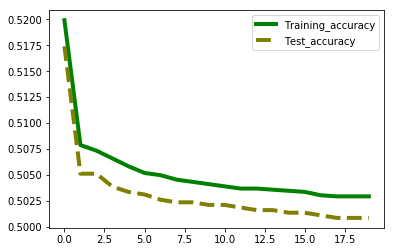

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_NB , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_NB, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

# KNN classifier

In [99]:
# Create and fit a nearest-neighbor classifier on D1 dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score_train_KN = []
score_test_KN = []
factor = []

for i in range(1,18,2):
    knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=i, 
                     p=2,
                     weights='uniform')
    knn.fit(X_train,np.ravel(y_train))
    factor.append(i)
    score_train_KN.append(accuracy_score(np.ravel(y_train),knn.predict(X_train)))
    score_test_KN.append(accuracy_score(y_test,knn.predict(X_test)))


In [100]:
print(knn.score(X_test,y_test))

0.8142678347934919


In [101]:
df_knn_d1 = pd.DataFrame()
df_knn_d1['Training_accuracy'] = score_train_KN
df_knn_d1['Test_accuracy'] = score_test_KN
df_knn_d1['K'] =factor

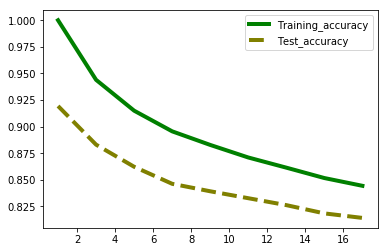

In [102]:
plt.plot( 'K', 'Training_accuracy', data=df_knn_d1 , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_knn_d1, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

# LDA

In [129]:
##LDA on training - D2 dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)
X_r2 = lda.fit(X_train, y_train).transform(X_train)

In [131]:
X_r2.shape

(9321, 1)

In [ ]:
##LDA on training - D2 dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)
X_r2 = lda.fit(final_one, y).transform(final_one)

# SVM

In [ ]:
from sklearn.svm import NuSVC
score_train_SVM = []
score_test_SVM = []
factor = []

for i in range(1,18,2):
    clf_svm = NuSVC(gamma='scale')
    knn.fit(data_one,np.ravel(final_label))
    factor.append(i)
    score_train_KN.append(accuracy_score(np.ravel(final_label),knn.predict(data_one)))
    score_test_KN.append(accuracy_score(y_test,knn.predict(data_two)))


print("Predictions form the classifier:")
print(knn.predict(data_two))
print("Target values:")
print(y_test)

In [ ]:
print(clf_dt.score(X_test,y_test))